In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pandas as pd

In [2]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words/cal_metrics_fixed_new.json')

data_improved_model = json.load(f)

f.close()

### Total Variation Distance

In [3]:
print('Altered TVD metrics (mean, st. dev., min, max)')
for key in data_improved_model.keys():
    print('Proportion of changed model samples:', key)
    tvd_biased_array = np.array(data_improved_model[key]['tvd_biased'])
    np.mean(tvd_biased_array), np.std(tvd_biased_array), np.min(tvd_biased_array), np.max(tvd_biased_array)
    print('Unbiased dist. and human maj. as truth', np.mean(tvd_biased_array), np.std(tvd_biased_array), np.min(tvd_biased_array), np.max(tvd_biased_array))

Altered TVD metrics (mean, st. dev., min, max)
Proportion of changed model samples: 0
Unbiased dist. and human maj. as truth 0.6331934246568682 0.22089438887639298 0.000292544427793473 0.9999185800552368
Proportion of changed model samples: 0.1
Unbiased dist. and human maj. as truth 0.6026873076694997 0.22971311164595823 0.0 0.9999185800552368
Proportion of changed model samples: 0.2
Unbiased dist. and human maj. as truth 0.5869336528015662 0.23555077210305986 0.0 0.9999185800552368
Proportion of changed model samples: 0.3
Unbiased dist. and human maj. as truth 0.562483448954671 0.23849735463276583 0.0009161029593087733 0.9999185800552368
Proportion of changed model samples: 0.4
Unbiased dist. and human maj. as truth 0.5534776900963587 0.23708998326845196 0.000292544427793473 0.9999185800552368
Proportion of changed model samples: 0.5
Unbiased dist. and human maj. as truth 0.5157646273053423 0.22901880170271885 0.0 0.9998108148574829
Proportion of changed model samples: 0.6
Unbiased di

In [3]:
tvd_biased = {}
tvd_unbiased = {}
ent_diff_biased = {}
ent_diff_unbiased = {}
for proportion in data_improved_model.keys():
    for metric in data_improved_model[str(proportion)].keys():
        if metric == 'tvd_biased':
            tvd_biased[proportion] = data_improved_model[str(proportion)][metric]
        elif metric == 'tvd_unbiased':
            tvd_unbiased[proportion] = data_improved_model[str(proportion)][metric]
        elif metric == 'ent_diff_biased':
            ent_diff_biased[proportion] = data_improved_model[str(proportion)][metric]
        else:
            ent_diff_unbiased[proportion] = data_improved_model[str(proportion)][metric]

In [4]:
def convert_to_list(dict_metric):
    list_change = []
    list_metric = []
    for key in dict_metric.keys():
        for i in range(len(dict_metric[key])):
            list_change.append(key)
            list_metric.append(dict_metric[key][i])
    return list_change, list_metric

In [5]:
list_change, list_metric = convert_to_list(tvd_biased)
df_tvd_biased = pd.DataFrame({'change': list_change, 'value': list_metric})

In [6]:
#same graph for 0, 0.2, 0.4, 0.6, 0.8, 1
compressed_tvd_biased = df_tvd_biased[((df_tvd_biased['change'] == '0') | (df_tvd_biased['change'] == '0.2') | (df_tvd_biased['change'] == '0.4') | (df_tvd_biased['change'] == '0.6') | (df_tvd_biased['change'] == '0.8') | (df_tvd_biased['change'] == '1'))]


Text(0.5, 0.98, 'Histogram of TVD Values with varying proportion of the model data improved')

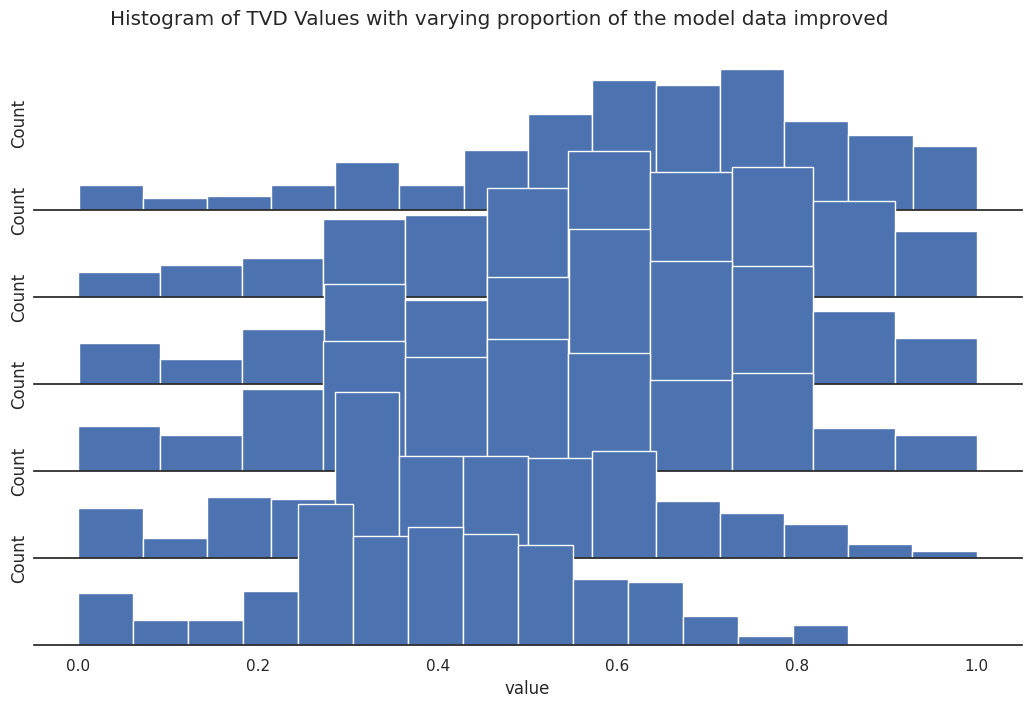

In [8]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

palette = sns.color_palette("Set2", 11)

g = sns.FacetGrid(compressed_tvd_biased, palette=palette, row="change", aspect=9, height=1.2)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1)
#g.map_dataframe(sns.histplot, x="value", color='blue')


g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

plt.suptitle('Histogram of TVD Values with varying proportion of the model data improved', y=0.98)

Text(0.5, 0.98, 'Histogram of TVD Values with varying proportion of the model data improved')

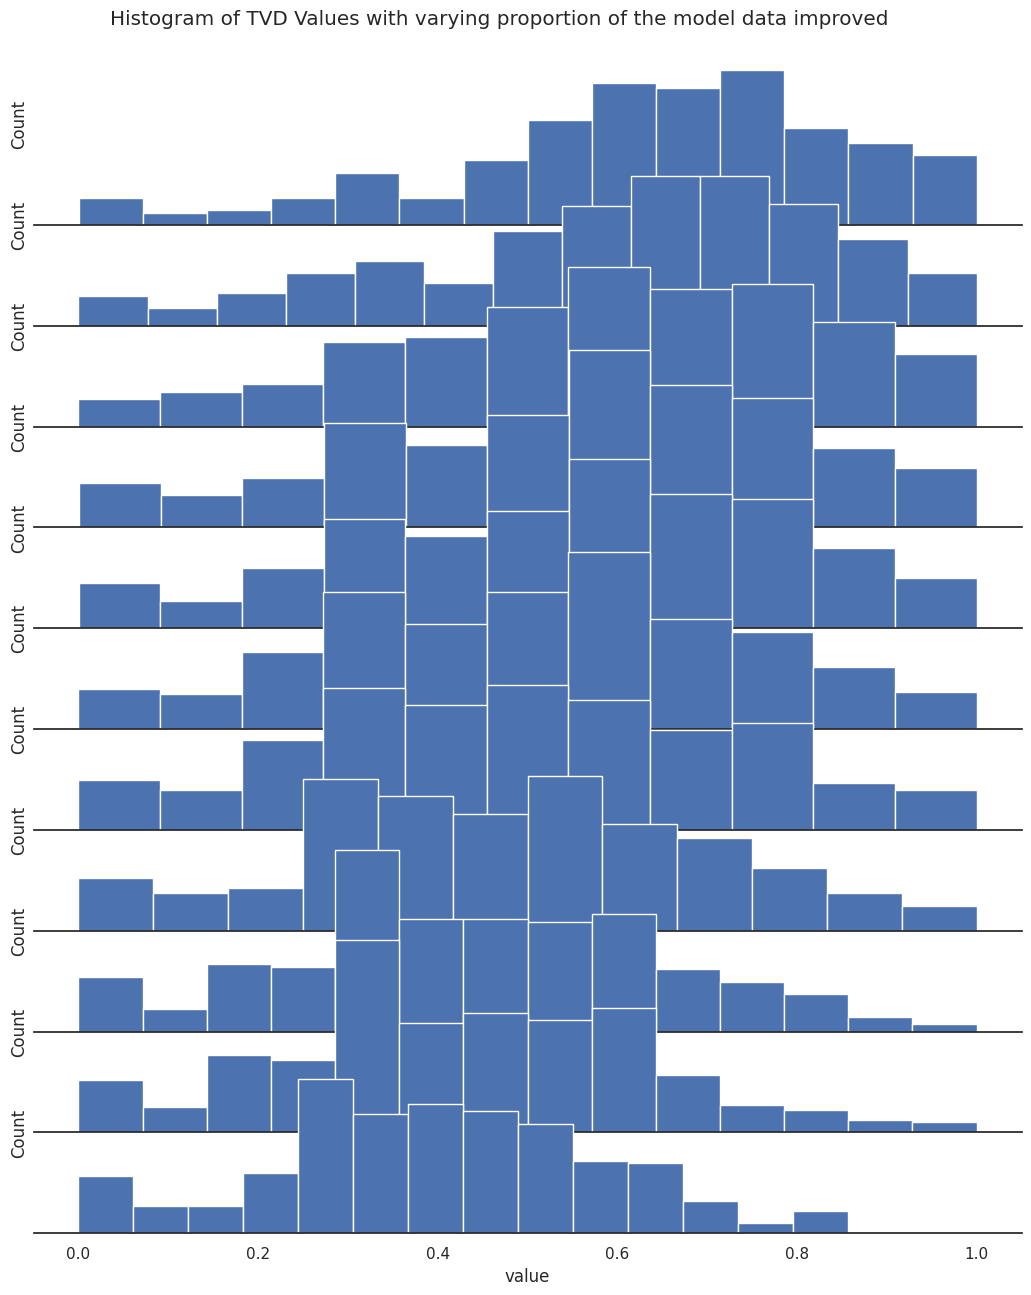

In [9]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

palette = sns.color_palette("Set2", 11)

g = sns.FacetGrid(df_tvd_biased, palette=palette, row="change", aspect=9, height=1.2)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1)
#g.map_dataframe(sns.histplot, x="value", color='blue')


g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

plt.suptitle('Histogram of TVD Values with varying proportion of the model data improved', y=0.98)

In [8]:
list_change, list_metric = convert_to_list(tvd_unbiased)
df_tvd_unbiased = pd.DataFrame({'change': list_change, 'value': list_metric})

In [9]:
#same graph for 0, 0.2, 0.4, 0.6, 0.8, 1
compressed_tvd_unbiased = df_tvd_unbiased[((df_tvd_unbiased['change'] == '0') | (df_tvd_unbiased['change'] == '0.2') | (df_tvd_unbiased['change'] == '0.4') | (df_tvd_unbiased['change'] == '0.6') | (df_tvd_unbiased['change'] == '0.8') | (df_tvd_unbiased['change'] == '1'))]


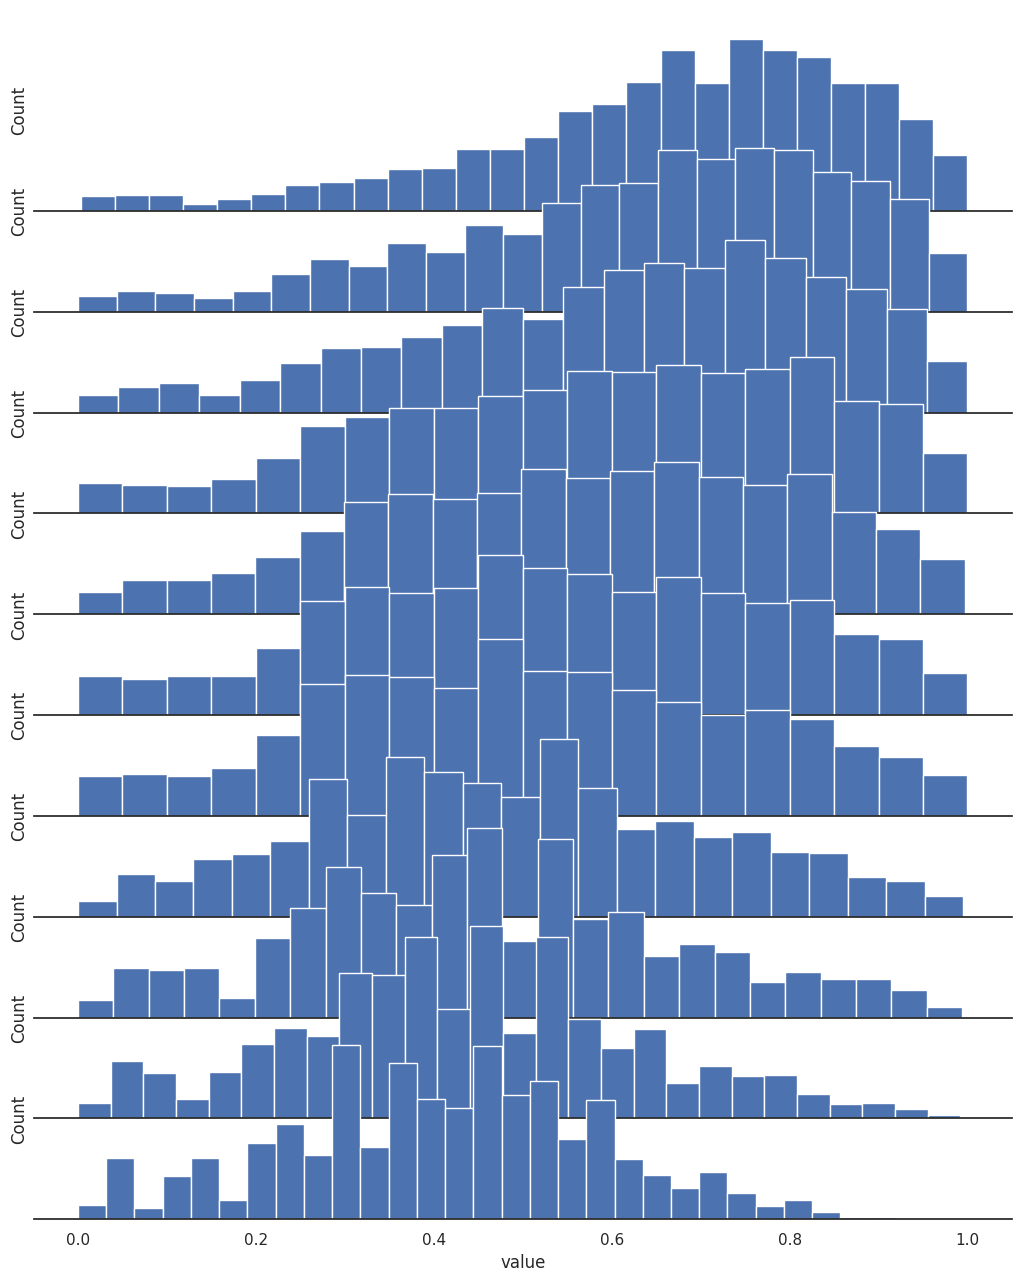

In [9]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

palette = sns.color_palette("Set2", 11)

g = sns.FacetGrid(df_tvd_unbiased, palette = palette, row="change", aspect=9, height=1.2)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1)
#g.map_dataframe(sns.histplot, x="value", color='blue')

g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

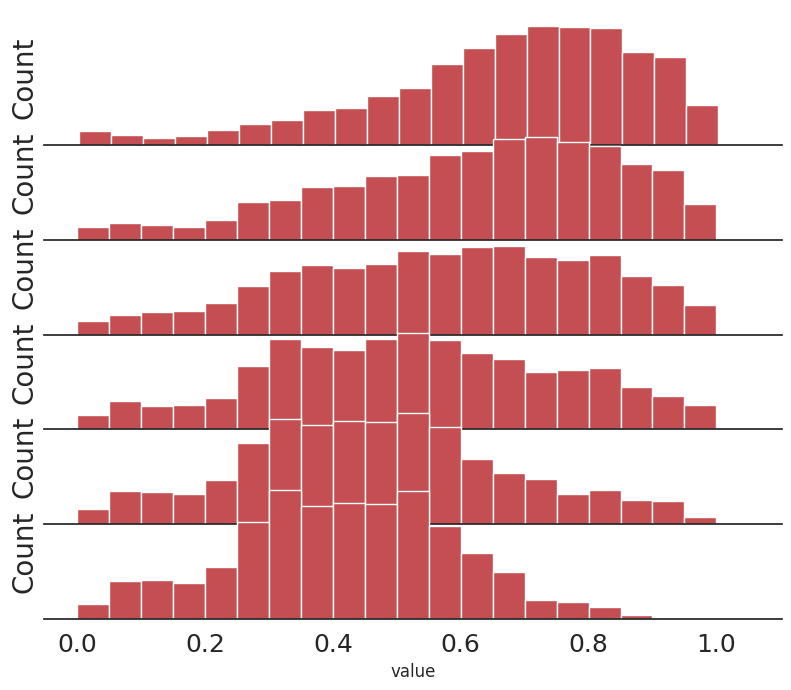

In [23]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
d = {'color': ['r', 'b', 'c', 'm', 'y', 'g']}

palette = sns.color_palette("Set2", 16)

g = sns.FacetGrid(compressed_tvd_unbiased, palette = palette, row="change", aspect=7, height=1.2, hue_kws=d)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1,  binwidth=0.05)
#g.map_dataframe(sns.histplot, x="value", color='blue')

g.fig.subplots_adjust(hspace=-.3)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

#g.set_xlabels("TVD Histograms with k% induced model TVD values with oracle's",fontsize=40)
g.set_ylabels("Count",fontsize=20)
g.tick_params(labelsize=18)

#plt.savefig('improved_model.pdf')

### Absolute entropy difference

In [13]:
def convert_to_list(dict_metric):
    list_change = []
    list_metric = []
    for key in dict_metric.keys():
        for i in range(len(dict_metric[key])):
            list_change.append(key)
            list_metric.append(abs(dict_metric[key][i]))
    return list_change, list_metric

In [14]:
list_change, list_metric = convert_to_list(ent_diff_biased)
df_ent_diff_biased = pd.DataFrame({'change': list_change, 'value': list_metric})

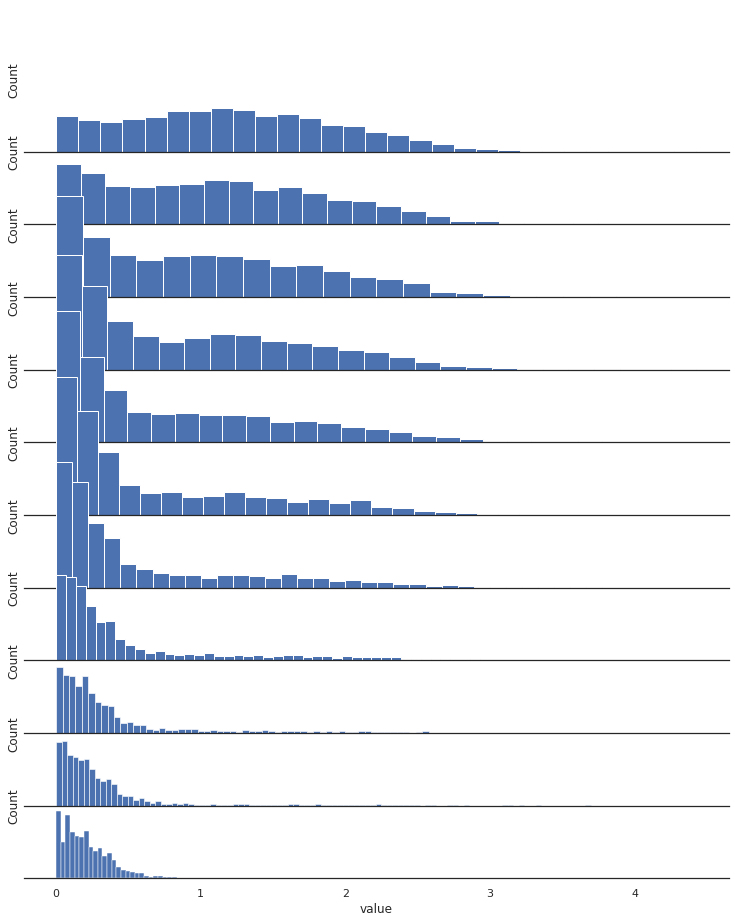

In [15]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

palette = sns.color_palette("Set2", 11)

g = sns.FacetGrid(df_ent_diff_biased, palette = palette, row="change", aspect=9, height=1.2)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1)
#g.map_dataframe(sns.histplot, x="value", color='blue')

g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

In [16]:
list_change, list_metric = convert_to_list(ent_diff_unbiased)
df_ent_diff_unbiased = pd.DataFrame({'change': list_change, 'value': list_metric})

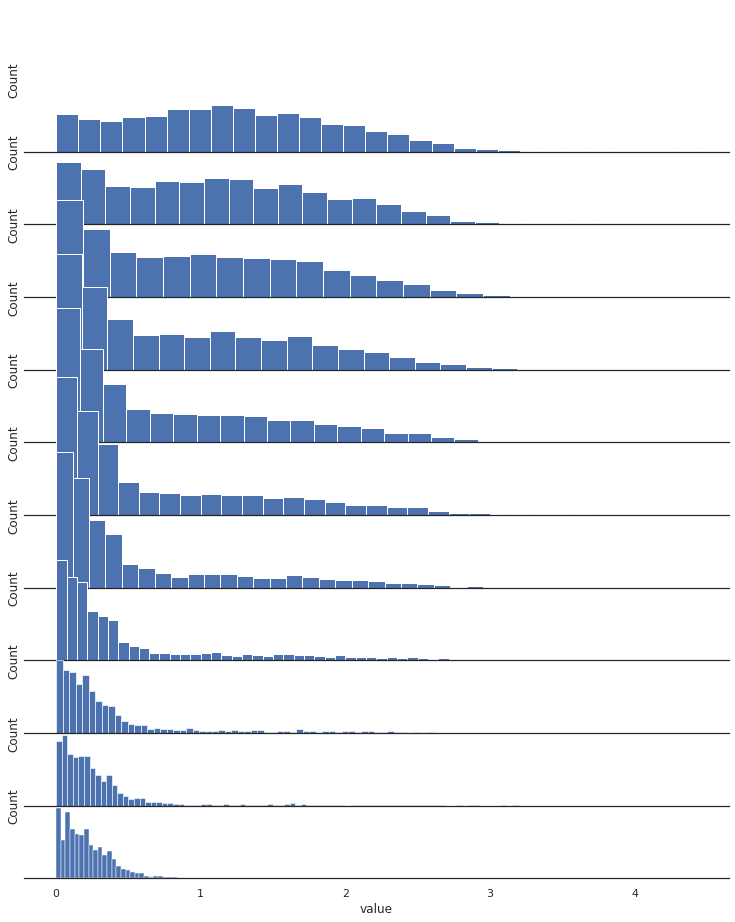

In [17]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df_ent_diff_unbiased, row="change", aspect=9, height=1.2)
g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1)
#g.map_dataframe(sns.histplot, x="value", color='blue')

g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

In [4]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words/cal_metrics_improved_model_fixed_1_10.json')

data_improved_model_original = json.load(f)

f.close()

In [5]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words_fine_tuned/cal_metrics_improved_model_fine_tuned_1_10.json')

data_improved_model_fine_tuned = json.load(f)

f.close()

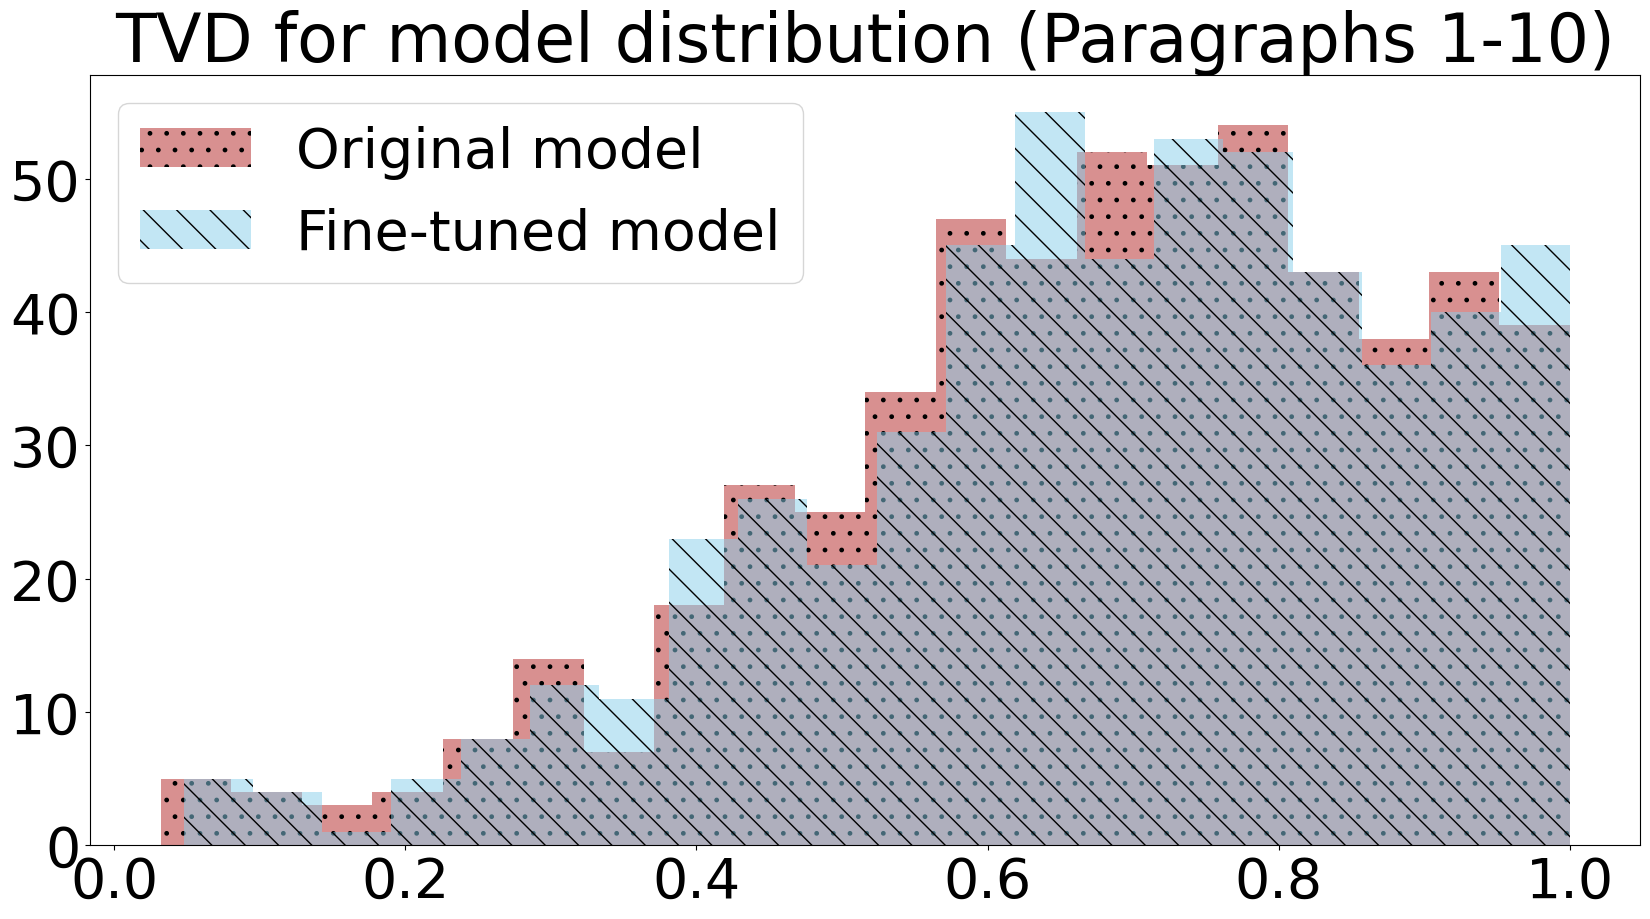

In [9]:
plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(20, 10))

plt.hist(data_improved_model_original['0']['tvd_unbiased'], bins=20, alpha=0.5, label='Original model', color='firebrick', hatch='.')
plt.hist(data_improved_model_fine_tuned['0']['tvd_unbiased'], bins=20, alpha=0.5, label='Fine-tuned model', color='Skyblue', hatch='\\')

plt.title("TVD for model distribution (Paragraphs 1-10)")
plt.legend(loc='upper left')

plt.savefig('fine_tuned_1_10.pdf', format="pdf",bbox_inches='tight') 
plt.show()

In [10]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words/cal_metrics_improved_model_fixed_11_20.json')

data_improved_model_original = json.load(f)

f.close()

In [11]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words_fine_tuned/cal_metrics_improved_model_fine_tuned_11_20.json')

data_improved_model_fine_tuned = json.load(f)

f.close()

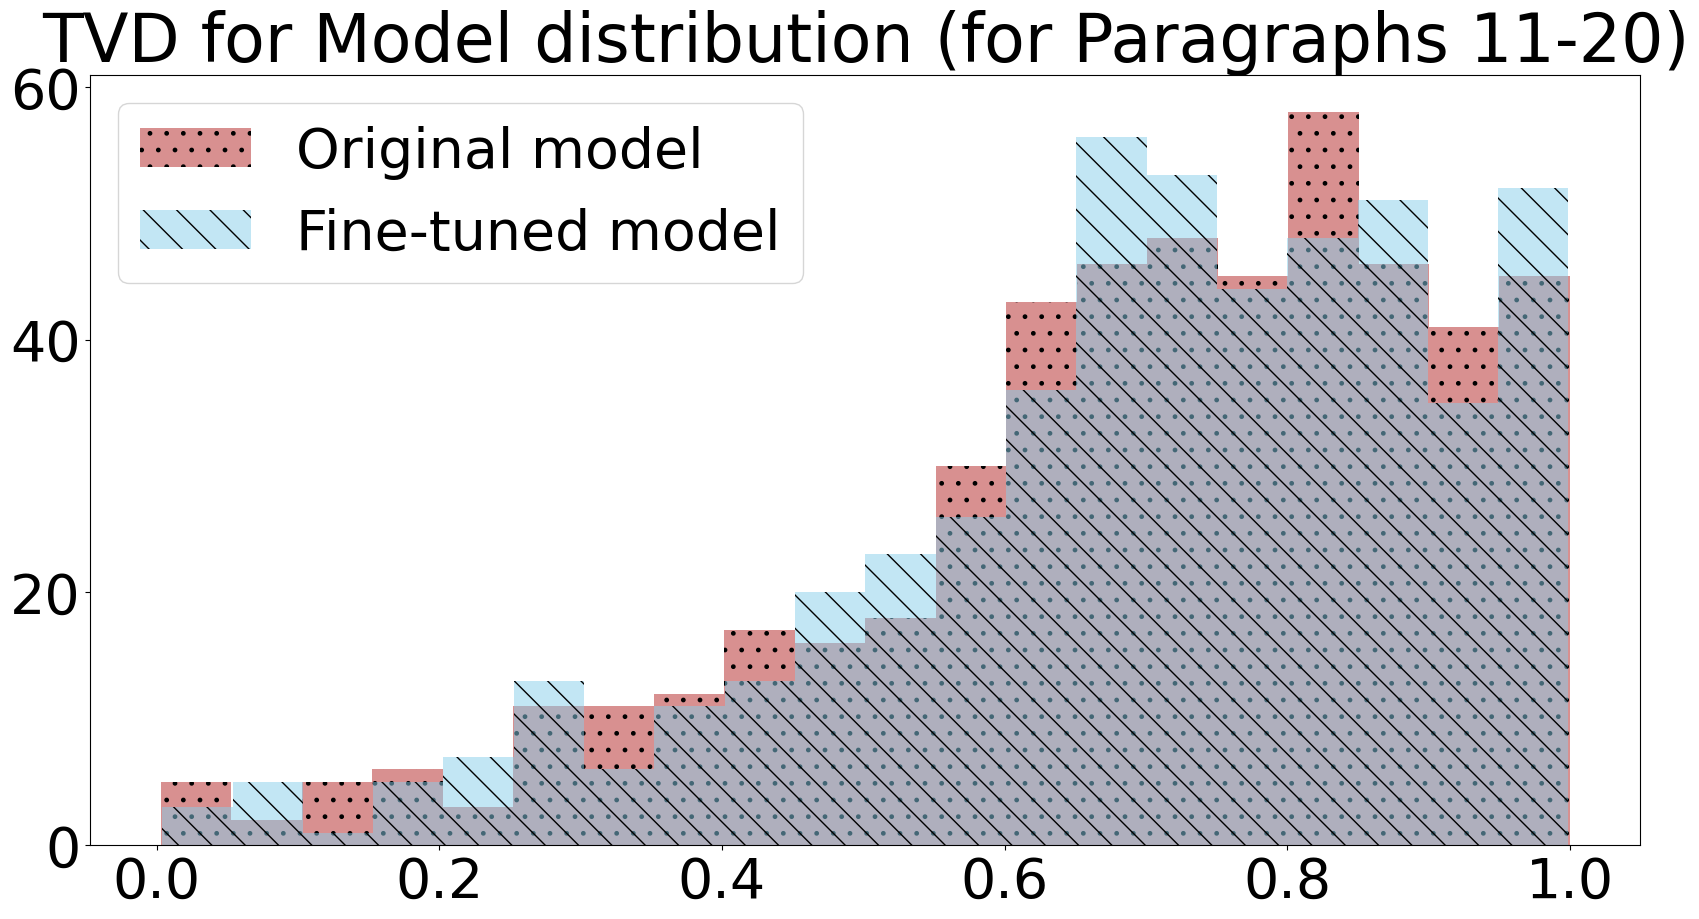

In [14]:
plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(20, 10))

plt.hist(data_improved_model_original['0']['tvd_unbiased'], bins=20, alpha=0.5, label='Original model', color='firebrick', hatch='.')
plt.hist(data_improved_model_fine_tuned['0']['tvd_unbiased'], bins=20, alpha=0.5, label='Fine-tuned model', color='Skyblue', hatch='\\')

plt.title("TVD for Model distribution (for Paragraphs 11-20)")
plt.legend(loc='upper left')

plt.savefig('fine_tuned_11_20.pdf', format="pdf",bbox_inches='tight') 
plt.show()

In [15]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words/cal_metrics_improved_model_fixed_21_30.json')

data_improved_model_original = json.load(f)

f.close()

In [16]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words_fine_tuned/cal_metrics_improved_model_fine_tuned_21_30.json')

data_improved_model_fine_tuned = json.load(f)

f.close()

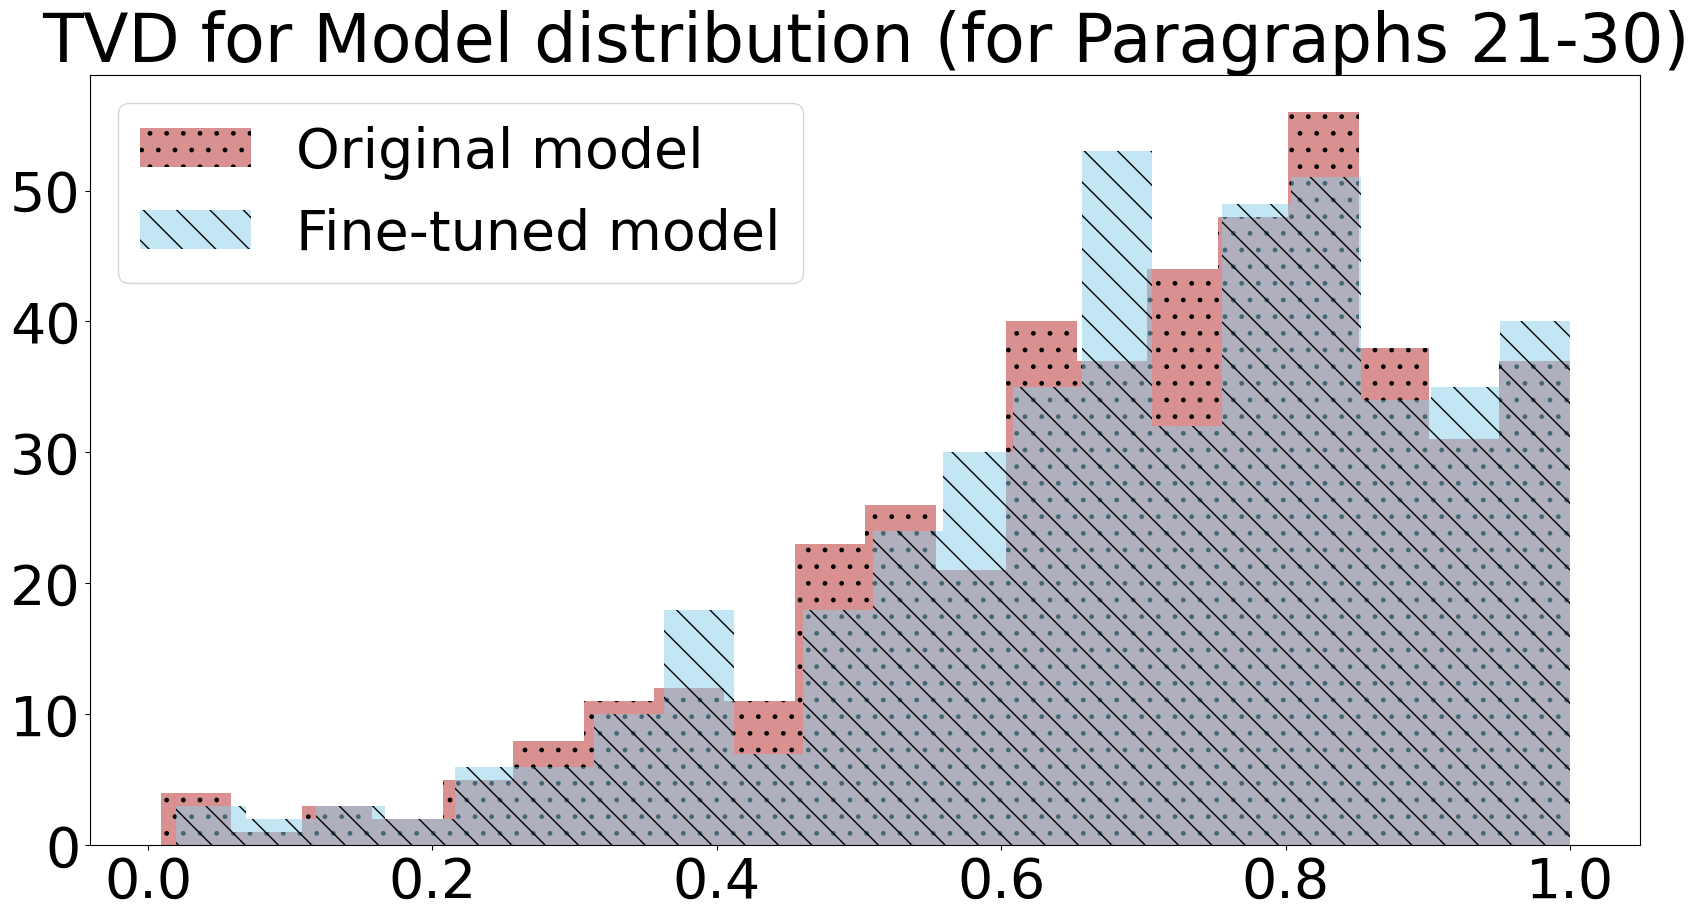

In [17]:
plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(20, 10))

plt.hist(data_improved_model_original['0']['tvd_unbiased'], bins=20, alpha=0.5, label='Original model', color='firebrick', hatch='.')
plt.hist(data_improved_model_fine_tuned['0']['tvd_unbiased'], bins=20, alpha=0.5, label='Fine-tuned model', color='Skyblue', hatch='\\')

plt.title("TVD for Model distribution (for Paragraphs 21-30)")
plt.legend(loc='upper left')
plt.savefig('fine_tuned_21_30.pdf', format="pdf",bbox_inches='tight') 
plt.show()

In [18]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words/cal_metrics_improved_model_fixed_31_40.json')

data_improved_model_original = json.load(f)

f.close()

In [19]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words_fine_tuned/cal_metrics_improved_model_fine_tuned_31_40.json')

data_improved_model_fine_tuned = json.load(f)

f.close()

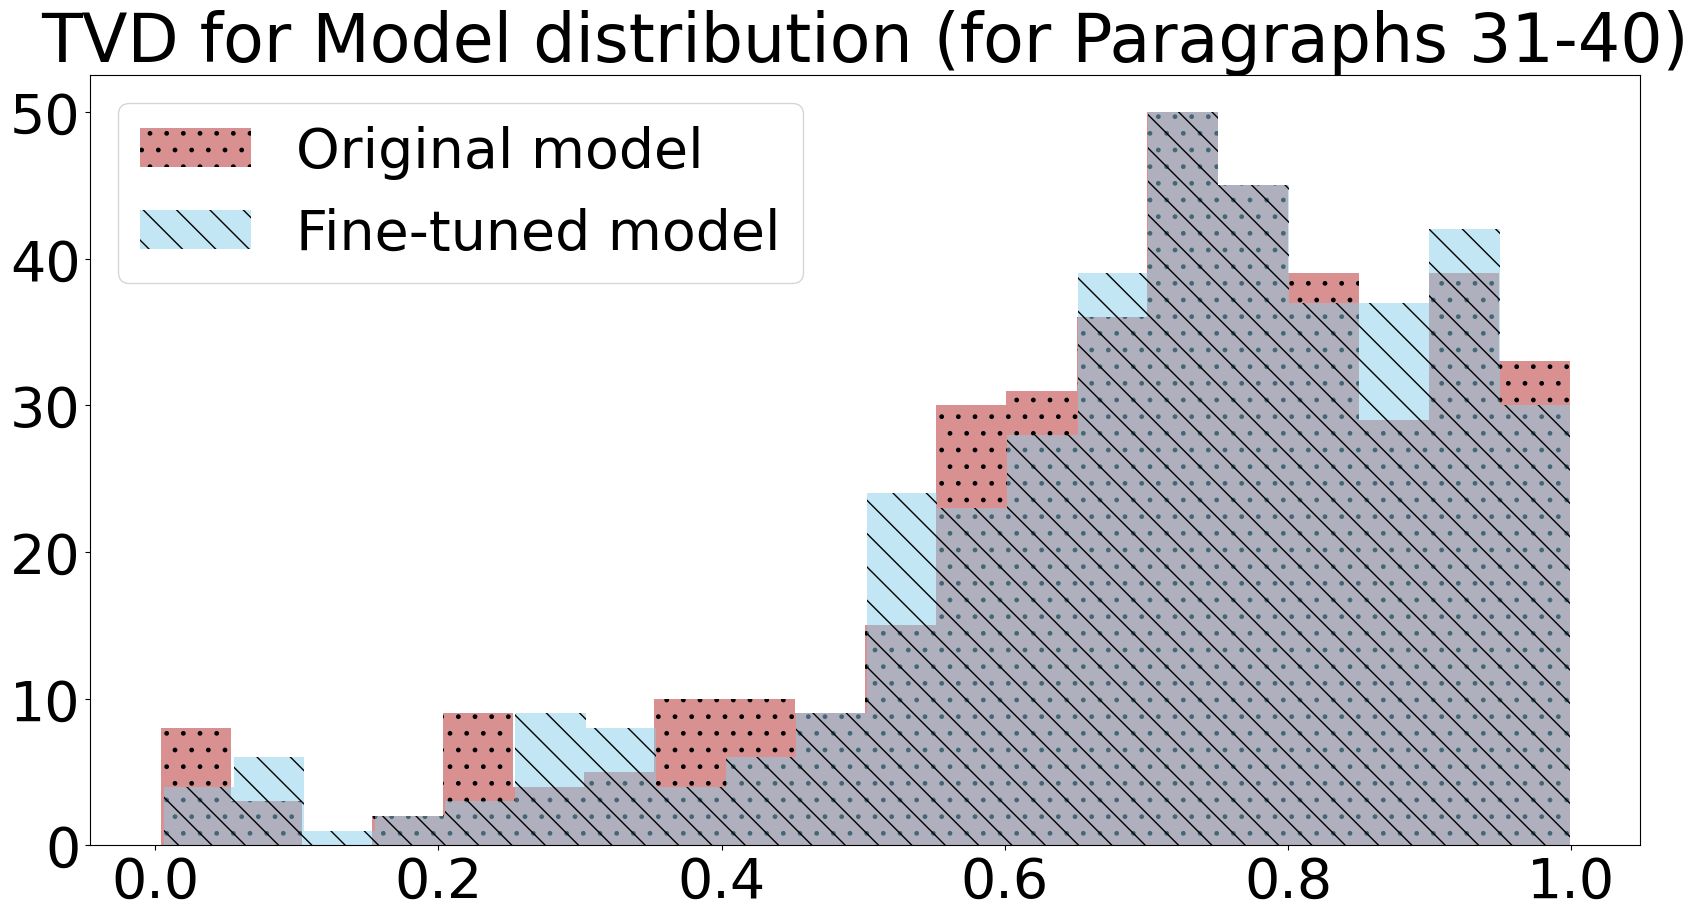

In [20]:
plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(20, 10))

plt.hist(data_improved_model_original['0']['tvd_unbiased'], bins=20, alpha=0.5, label='Original model', color='firebrick', hatch='.')
plt.hist(data_improved_model_fine_tuned['0']['tvd_unbiased'], bins=20, alpha=0.5, label='Fine-tuned model', color='Skyblue', hatch='\\')

plt.title("TVD for Model distribution (for Paragraphs 31-40)")
plt.legend(loc='upper left')
plt.savefig('fine_tuned_31_40.pdf', format="pdf",bbox_inches='tight') 
plt.show()

In [37]:
#plot loss curves for fine tuned models

f = open('/home/eilia/calibration_project/output/fine_tuning/eilia.2514836/fine_tuning/training_stats_test_31-40.json')
loss = json.load(f)
f.close()

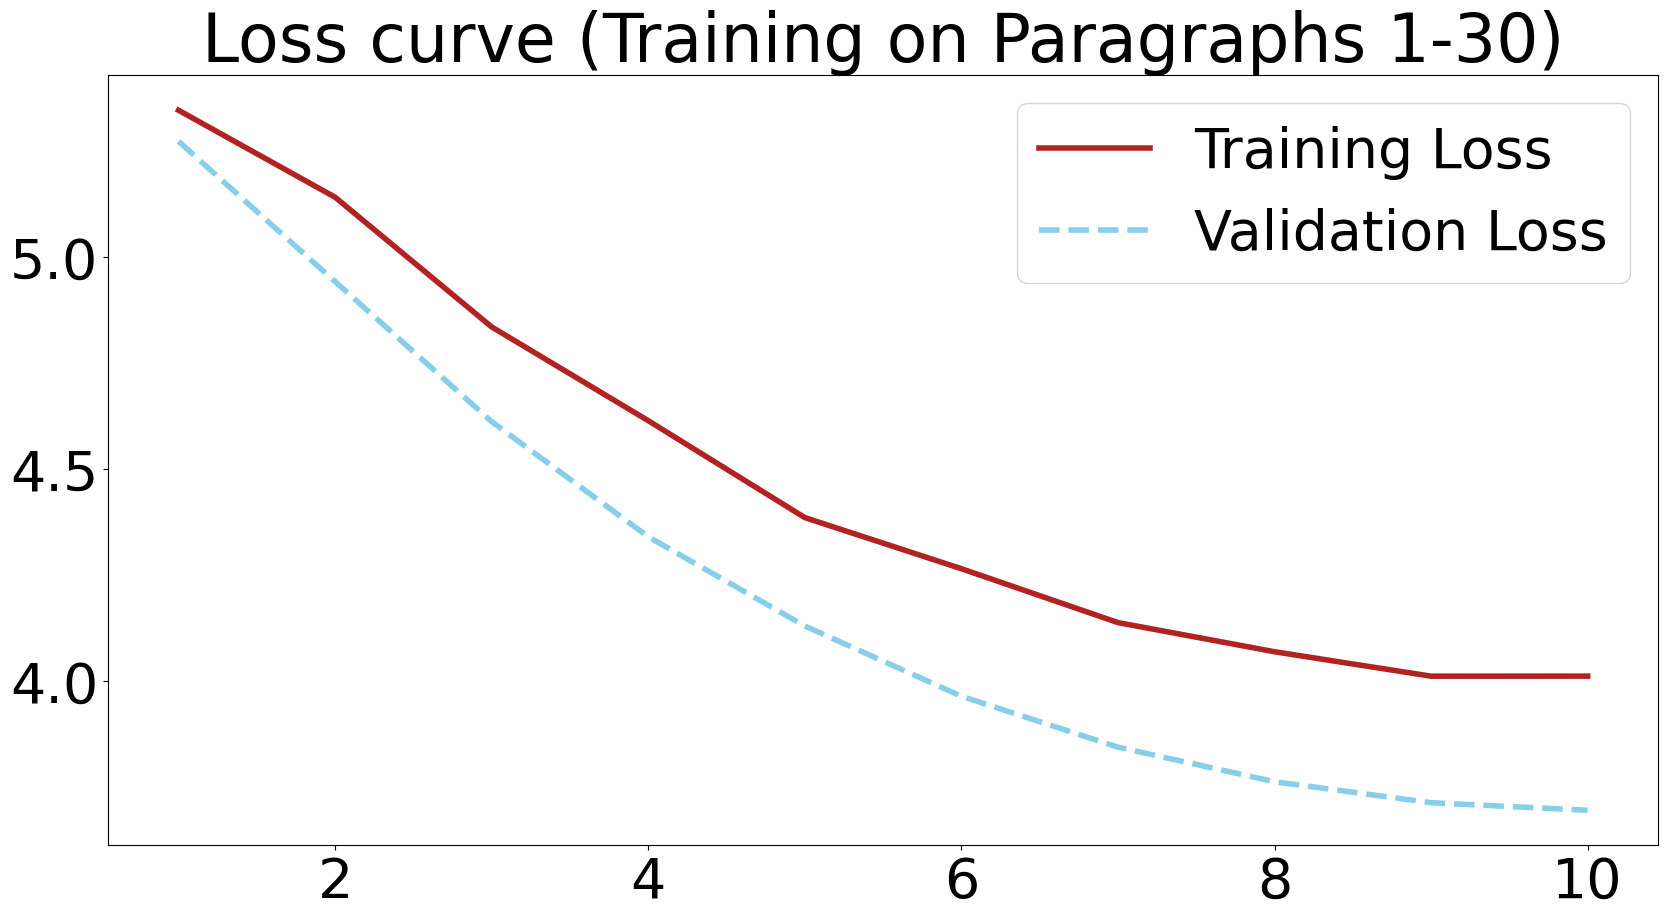

In [38]:
epochs = [item['epoch'] for item in loss]
training_loss = [item['Training Loss'] for item in loss]
valid_loss = [item['Valid. Loss'] for item in loss]

plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(20, 10))

plt.plot(epochs, training_loss, label = 'Training Loss', color='firebrick', linewidth=4)
plt.plot(epochs, valid_loss, '--', label = 'Validation Loss', color='Skyblue', linewidth=4)

plt.title("Loss curve (Training on Paragraphs 1-30)")
plt.legend(loc='upper right')
plt.savefig('loss_curve_test_21_30.pdf', format="pdf",bbox_inches='tight') 
plt.show()

Dropout Symptoms: validation loss is consistently lower than the training loss, the gap between them remains more or less the same size and training loss has fluctuations.

Dropout penalizes model variance by randomly freezing neurons in a layer during model training. Like L1 and L2 regularization, dropout is only applicable during the training process and affects training loss, leading to cases where validation loss is lower than training loss.


In [3]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words/cal_metrics_improved_model_extra.json')
data_improved_model_fine_tuned = json.load(f)
f.close()

In [7]:
data_improved_model_fine_tuned['0']['ent_h2']

[1.6385066509246826,
 1.7751249074935913,
 2.319575071334839,
 1.9157651662826538,
 2.4150521755218506,
 2.080557107925415,
 2.2899515628814697,
 1.9850798845291138,
 1.7728745937347412,
 2.7616255283355713,
 1.3661588430404663,
 2.4547436237335205,
 2.3854286670684814,
 2.1760342121124268,
 2.5536818504333496,
 1.8464504480361938,
 2.314663887023926,
 2.319575071334839,
 2.857102632522583,
 2.718473196029663,
 2.250260353088379,
 2.1639556884765625,
 2.04231595993042,
 2.388889789581299,
 1.989991307258606,
 2.857102632522583,
 2.080557107925415,
 1.6796478033065796,
 1.2772883176803589,
 0.3943977355957031,
 1.025093913078308,
 2.4843671321868896,
 1.4998769760131836,
 1.3273628950119019,
 2.4150521755218506,
 0.7909873723983765,
 2.4843671321868896,
 1.652590274810791,
 0.5623351335525513,
 1.5953541994094849,
 2.250260353088379,
 1.2592004537582397,
 1.2706817388534546,
 -0.0,
 1.0126631259918213,
 1.2772883176803589,
 1.3034508228302002,
 1.1633710861206055,
 1.4455413818359375,
 

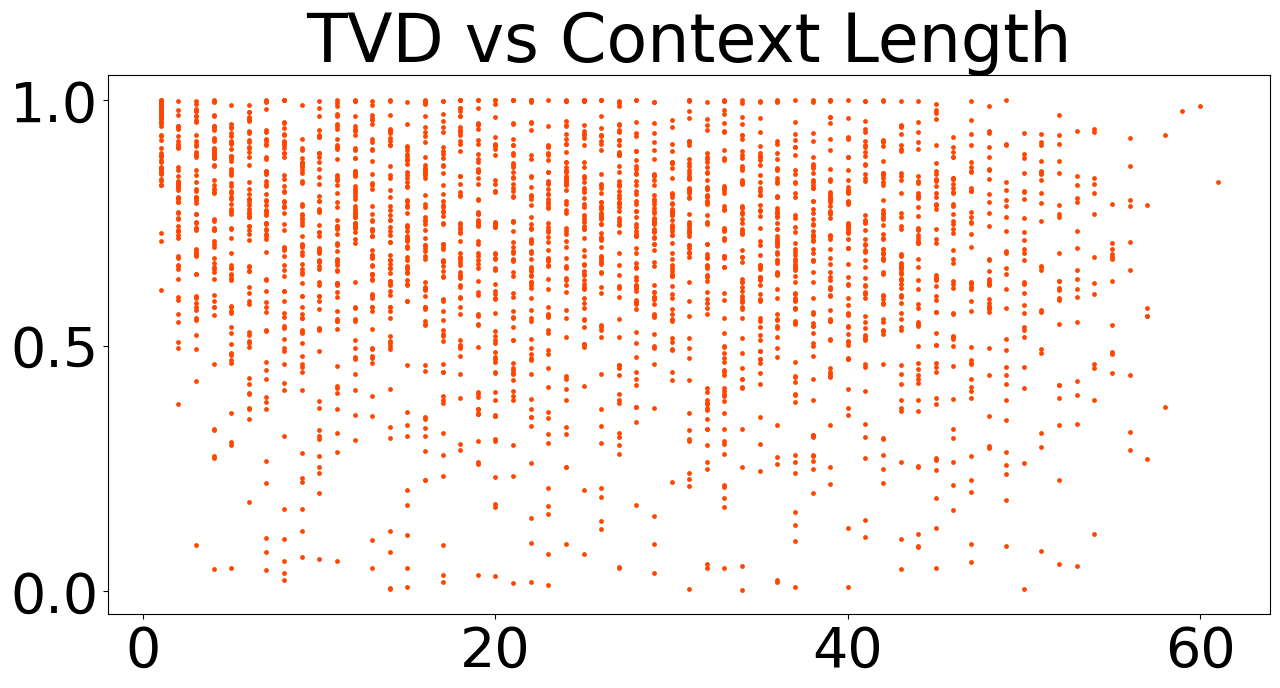

In [9]:
plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(15, 7))
plt.scatter(data_improved_model_fine_tuned['0']['context_length'], data_improved_model_fine_tuned['0']['tvd_unbiased'],
            s = 6, c = 'orangered')

plt.title("TVD vs Context Length")
plt.savefig('TVDvsContextlength.pdf', format="pdf",bbox_inches='tight')
plt.show()

        # plt.rc('font', size=40)# controls default text sizes

        # fig, ax = plt.subplots(figsize=(20, 10))
        # ax.bar(support_original_human, probs_original_human, alpha=0.5, label = 'Human Distribution (Prob. mass shown:' + "{:.2f}".format(prob_mass_human) + ')', color = 'orangered', hatch='//')
        # ax.bar(support_model, probs_model, alpha=0.5, label = 'Model Distribution (Prob. mass shown:' + "{:.2f}".format(prob_mass_unbiased) + ')', color = 'dodgerblue', hatch = '.')
        # ax.legend(loc=1, prop={'size': 35})

        # ax.set_xlabel('Word', fontsize=40)
        # ax.set_ylabel('Probability', fontsize=40)
        # ax.set_title('Context: ' + context[:41]+ '\n' + context[41:89], size = 40,fontweight="bold")
        # #+ '\n' + context[47:101] +  '\n' +  context[89:136]+ '\n' +  context[156:]
        # ax.tick_params(axis = 'x',labelrotation=90)    

        # plt.savefig('dists_' + str(word_num) + '.pdf', format="pdf",bbox_inches='tight') #dpi=300, 
        # plt.show()

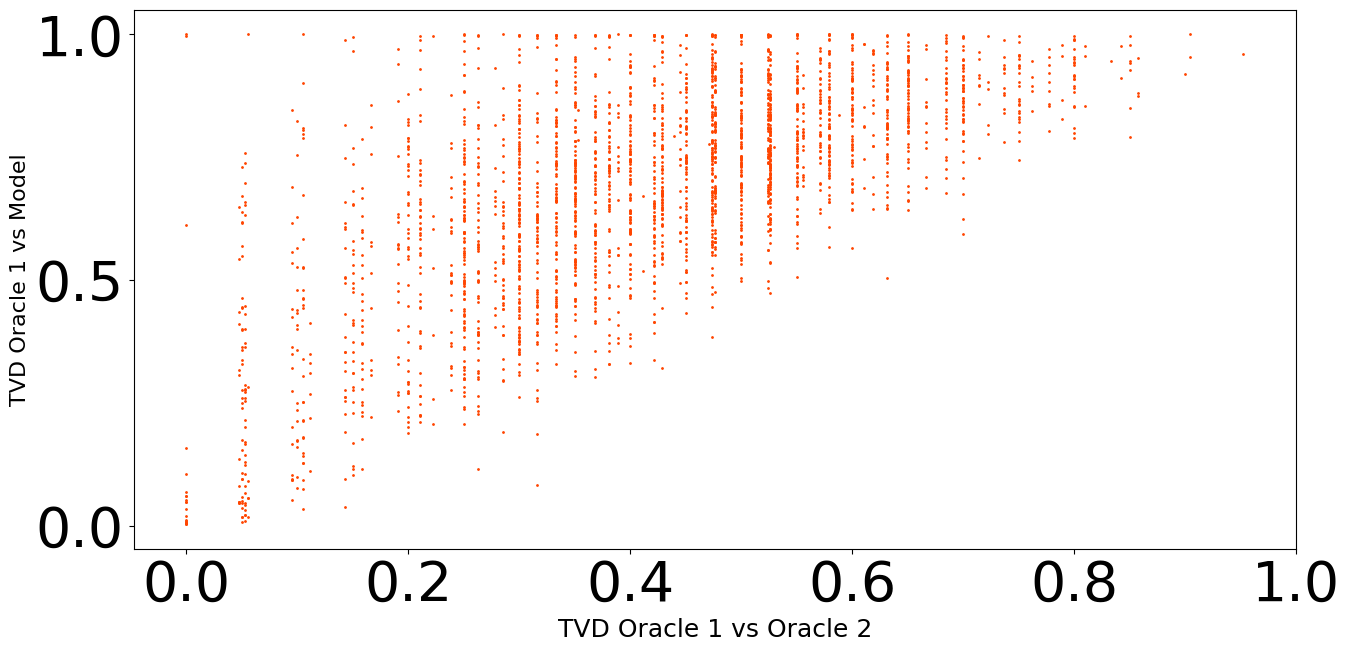

In [4]:
plt.subplots(figsize=(15, 7))
plt.rc('font', size=40)# controls default text sizes

plt.scatter(data_improved_model_fine_tuned['1']['tvd_unbiased'], data_improved_model_fine_tuned['0']['tvd_unbiased'],
s = 1, c = 'orangered')

plt.xlabel('TVD Oracle 1 vs Oracle 2', fontsize=18)
plt.ylabel('TVD Oracle 1 vs Model', fontsize=16)
plt.show()

#higher TVD among the human oracles might suggest that the open cloze task is less constrained - we expect highly 
#variable answers, hence 2 disjoint oracles would have a higher TVD. 
#We plot the TVD between oracles against the TVD of an oracle against the model. 

#As hypothesised, highly-constrained instances (aka, instances where the oracles' distributions have a low TVD),
#have a lower TVD (the model does a better job at predicting a distribution similar to humans), while for less constrained 
#cases the model does worse when it comes to predicting a human like distribution

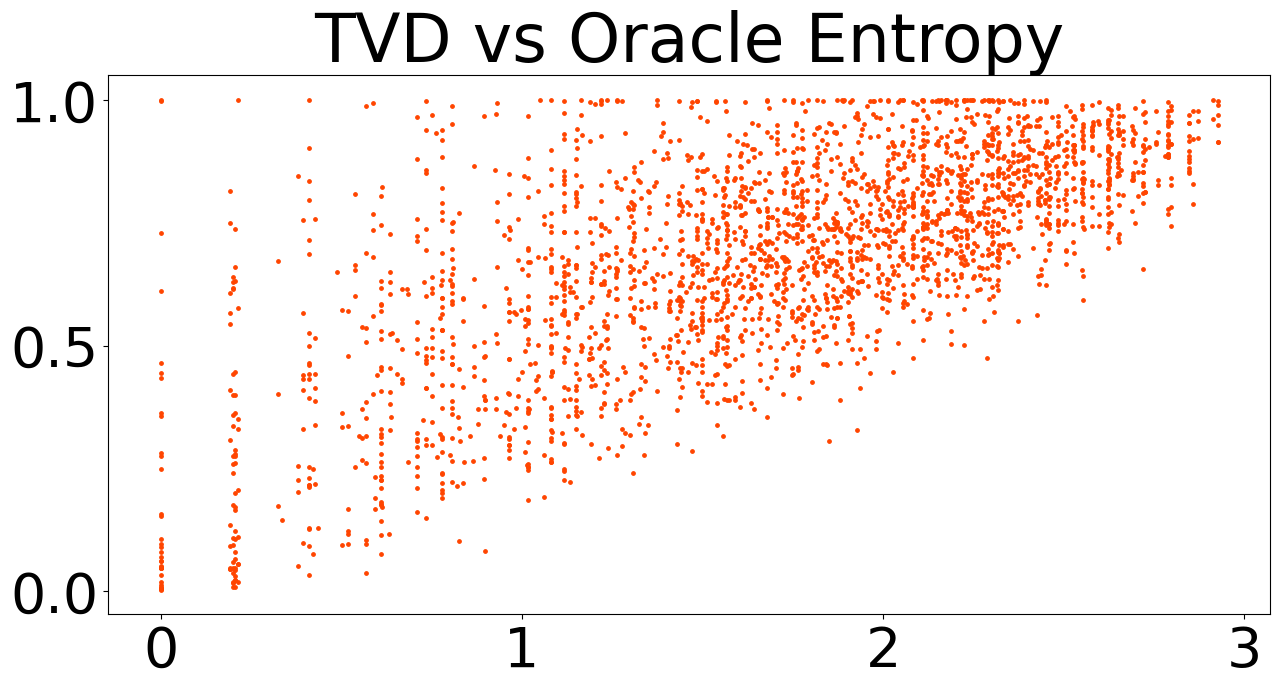

In [10]:
plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(15, 7))
plt.scatter(data_improved_model_fine_tuned['0']['ent_h1'], data_improved_model_fine_tuned['0']['tvd_unbiased'],
            s = 6, c = 'orangered')

plt.title("TVD vs Oracle Entropy")
plt.savefig('TVDvsOracleEntropy.pdf', format="pdf",bbox_inches='tight')
plt.show()

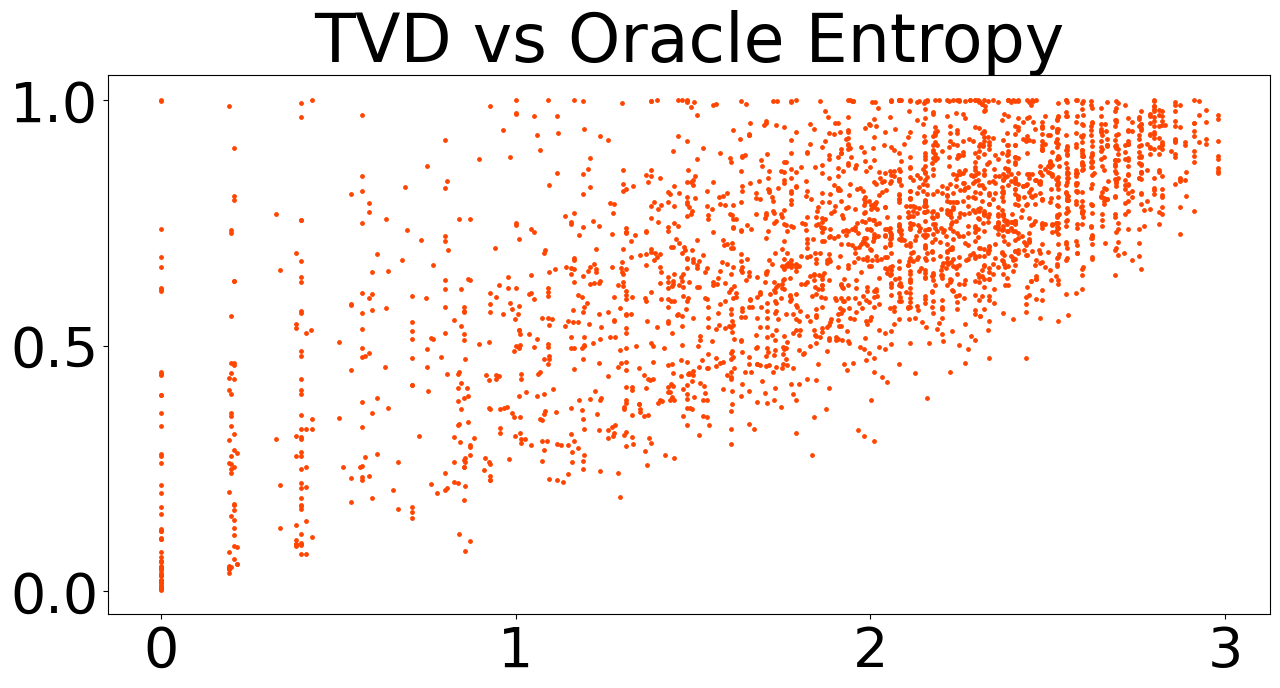

In [11]:
plt.rc('font', size=40)# controls default text sizes
plt.subplots(figsize=(15, 7))
plt.scatter(data_improved_model_fine_tuned['0']['ent_h2'], data_improved_model_fine_tuned['0']['tvd_unbiased'],
            s = 6, c = 'orangered')

plt.title("TVD vs Oracle Entropy")
plt.savefig('TVDvsOracleEntropy.pdf', format="pdf",bbox_inches='tight')
plt.show()

In [5]:
from sklearn import linear_model

In [6]:
clf = linear_model.ARDRegression()

In [7]:
y = data_improved_model_fine_tuned['0']['tvd_unbiased']

x_1 = data_improved_model_fine_tuned['1']['tvd_unbiased']
x_2 = data_improved_model_fine_tuned['0']['context_length']

In [10]:
x = np.array([[x_1[i],x_2[i]] for i in range(len(x_1))])
y = np.array(y)

In [11]:
clf.fit(x, y)

ARDRegression()

In [12]:
clf.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'n_iter': 300,
 'threshold_lambda': 10000.0,
 'tol': 0.001,
 'verbose': False}

In [13]:
x

array([[ 0.30000004,  1.        ],
       [ 0.45000005,  2.        ],
       [ 0.55000007,  3.        ],
       ...,
       [ 0.84210533, 59.        ],
       [ 0.68421054, 60.        ],
       [ 0.47368422, 61.        ]])

In [20]:
clf.predict([[0.7, 16]])

array([0.9177647])

In [21]:
clf.coef_

array([0.81262669, 0.        ])

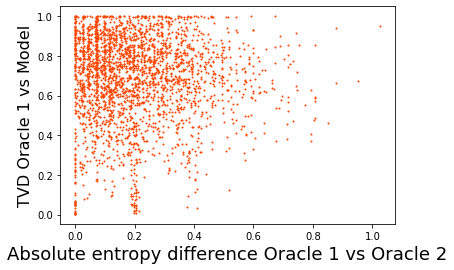

In [11]:
plt.scatter([abs(x) for x in data_improved_model_fine_tuned['1']['ent_diff']], data_improved_model_fine_tuned['0']['tvd_unbiased'],
s = 1, c = 'orangered')

plt.xlabel('Absolute entropy difference Oracle 1 vs Oracle 2', fontsize=18)
plt.ylabel('TVD Oracle 1 vs Model', fontsize=16)
plt.show()

In [3]:
f = open('/home/eilia/calibration_project/output/data_preprocessing_words/cal_metrics_fixed_new.json')
data = json.load(f)
f.close()
